In [1]:
# Importing necassary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('bmh')

from warnings import filterwarnings
filterwarnings('ignore')
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
#Importing data
Data_of_Attack_Back_PortSweep=pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
Data_of_Attack_Back=pd.read_csv('Data_of_Attack_Back.csv')
Data_of_Attack_Back_FTPWrite=pd.read_csv('Data_of_Attack_Back_FTPWrite.csv')
Data_of_Attack_Back_GuessPassword=pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
Data_of_Attack_Back_Neptune=pd.read_csv('Data_of_Attack_Back_Neptune.csv')
Data_of_Attack_Back_NMap=pd.read_csv('Data_of_Attack_Back_NMap.csv')
Data_of_Attack_Back_Normal=pd.read_csv('Data_of_Attack_Back_Normal.csv')
Data_of_Attack_Back_RootKit=pd.read_csv('Data_of_Attack_Back_RootKit.csv')
Data_of_Attack_Back_Satan=pd.read_csv('Data_of_Attack_Back_Satan.csv')
Data_of_Attack_Back_Smurf=pd.read_csv('Data_of_Attack_Back_Smurf.csv')
Data_of_Attack_Back_BufferOverflow=pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv')


## Data Preparation

In [3]:
#Creating attack variable
Data_of_Attack_Back_PortSweep['attack']='PortSweep'
Data_of_Attack_Back['attack']='Back'
Data_of_Attack_Back_FTPWrite['attack']='FTPWrite'
Data_of_Attack_Back_GuessPassword['attack']='GuessPassword'
Data_of_Attack_Back_Neptune['attack']='Neptune'
Data_of_Attack_Back_NMap['attack']='NMap'
Data_of_Attack_Back_Normal['attack']='Normal'
Data_of_Attack_Back_RootKit['attack']='RootKit'
Data_of_Attack_Back_Satan['attack']='Satan'
Data_of_Attack_Back_Smurf['attack']='Smurf'
Data_of_Attack_Back_BufferOverflow['attack']='BufferOverflow'

In [4]:
# Merging all the tables
data= pd.concat([Data_of_Attack_Back_PortSweep,Data_of_Attack_Back,
Data_of_Attack_Back_FTPWrite, Data_of_Attack_Back_GuessPassword,
Data_of_Attack_Back_Neptune,Data_of_Attack_Back_NMap,
Data_of_Attack_Back_Normal,Data_of_Attack_Back_RootKit,
Data_of_Attack_Back_Satan,Data_of_Attack_Back_Smurf,
Data_of_Attack_Back_BufferOverflow], axis=0,
ignore_index = True,sort = False)

In [5]:
data.shape

(817550, 83)

In [6]:
# Removing outer spaces from the column names
data.columns= data.columns.str.strip()

In [7]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', '0.0026',
       '0', '0.07', '0.3', '0.00116', '0.00451', '0.4', '0.5', '0.6', '0.2',
       '0.7', '0.1', '0.8', '0.9', '0.10', '0.11', '0.1.1', '0.12', '0.1.2',
       '0.13', 

In [8]:
data = data.iloc[:, :42]

In [13]:
# Checking missing values
data.isna().sum().sum()

0

In [10]:
data.dropna(inplace=True)

In [11]:
# Changing the datatypes of the columns
data[['protocol_type','service','flag','land','logged_in',
'root_shell','su_attempted','is_host_login','is_guest_login']]=data[['protocol_type','service','flag','land',
'logged_in','root_shell','su_attempted','is_host_login','is_guest_login']].astype('O')

In [12]:
#Making different groups of features for EDA
df_num= data.select_dtypes(include=['int64','float64'])

Basic_features=['duration', 'protocol_type', 'flag', 'src_bytes','dst_bytes', 'land', 'wrong_fragment', 'urgent']

Content_related_features=['hot','num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells','num_access_files', 'num_outbound_cmds', 'is_host_login','is_guest_login']

Time_realted_features=['count', 'srv_count', 'serror_rate', 'srv_error_rate','rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 
'diff_srv_rate','srv_diff_host_rate']

Host_based_features=['dst_host_count', 'dst_host_srv_count','dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate','dst_host_serror_rate', 'dst_host_srv_serror_rate',
'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

# EDA

In [14]:
# Printing the info about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817543 entries, 0 to 817549
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817543 non-null  float64
 1   protocol_type                817543 non-null  object 
 2   service                      817543 non-null  object 
 3   flag                         817543 non-null  object 
 4   src_bytes                    817543 non-null  float64
 5   dst_bytes                    817543 non-null  float64
 6   land                         817543 non-null  object 
 7   wrong_fragment               817543 non-null  float64
 8   urgent                       817543 non-null  float64
 9   hot                          817543 non-null  float64
 10  num_failed_logins            817543 non-null  float64
 11  logged_in                    817543 non-null  object 
 12  num_compromised              817543 non-null  float64
 13 

In [15]:
# Describing the dataset
data.describe(percentiles=[0.1,0.3,0.5,0.7,0.9])

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,817543.000000,817543.000000,817543.000000,8.175430e+05,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,...,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000,817543.000000
mean,0.000877,0.004961,0.024862,3.669532e-07,0.000002,0.002455,0.000016,0.000275,0.001462,0.000284,...,0.166870,0.161653,0.066794,0.003380,0.006147,0.001682,0.024865,0.024852,0.005372,0.005279
std,0.026636,0.033235,0.066634,3.317920e-04,0.000766,0.041469,0.001618,0.010337,0.031776,0.011741,...,0.102057,0.111642,0.043421,0.008556,0.017458,0.003708,0.043062,0.043152,0.021920,0.022070
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013000,0.007000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.077000,0.023000,0.017000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.002170,0.003670,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
70%,0.000000,0.002840,0.014810,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.005000,0.002000,0.002000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.003670,0.066910,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.008000,0.014000,0.005000,0.100000,0.100000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000e-01,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,...,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


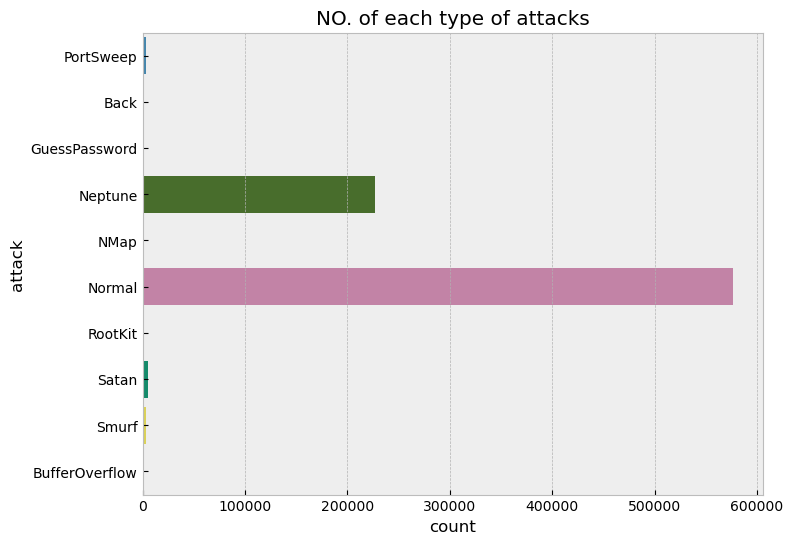

In [16]:
# Counts for each type of attacks
plt.figure(figsize=[8,6])
sns.countplot(y=data['attack'],)
plt.title('NO. of each type of attacks')
plt.show()

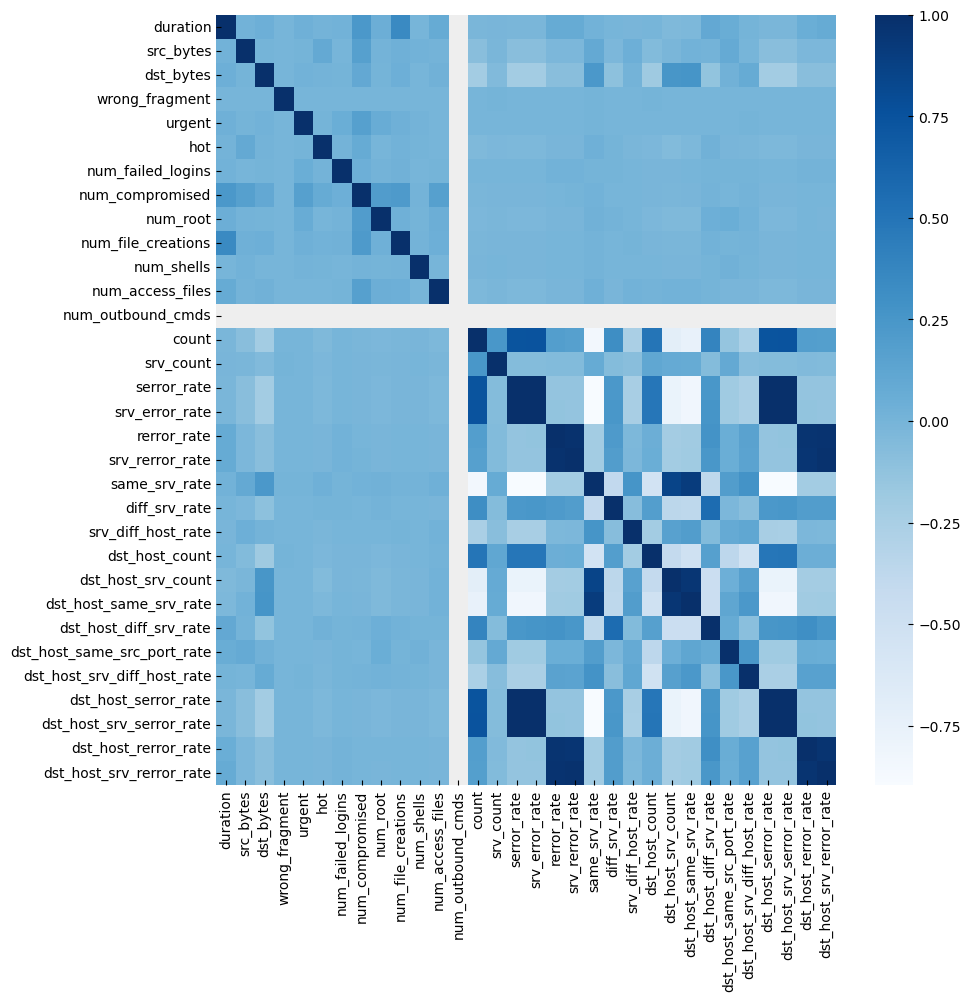

In [17]:
# Plotting correlation
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),cmap="Blues")
plt.show()

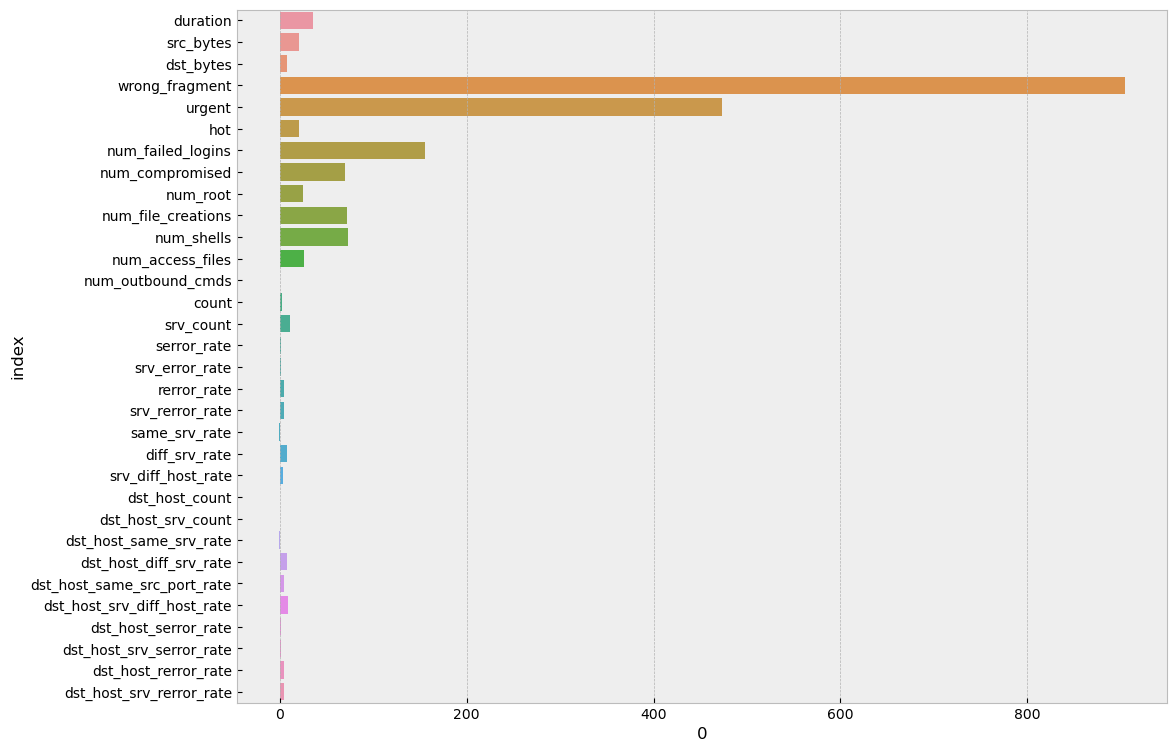

In [20]:
# Checking the skewness of data
skewness={}
for i in data.select_dtypes(include=['int64','float64']):
  skewness[i]=data[i].skew()
plt.figure(figsize=[12,9])
skew=pd.DataFrame.from_dict(skewness,orient ='index').reset_index()
sns.barplot(y=skew['index'],x=skew[0])
plt.show()

Data preparation continued

In [21]:
# Creating different columns for binary classification 
data['Normal']= np.where(data['attack']=='Normal','1','0')

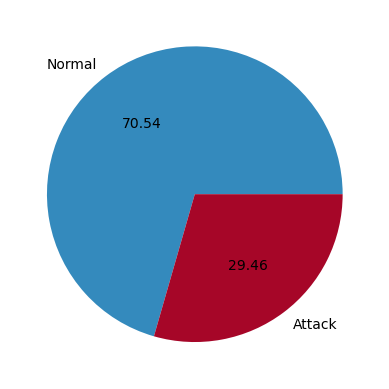

In [22]:
# Checking if the data is imbalances
plt.pie(data['Normal'].value_counts() ,autopct='%.2f',labels=['Normal','Attack'])
plt.show()
# We can see that the data is imbalanced

In [23]:
# Checking the value counts
data['Normal'].value_counts()

1    576710
0    240833
Name: Normal, dtype: int64

Feature Selection and data preparation continued

In [24]:
# Taking a 10% sample from the dataset
df= data.sample(frac=0.1, random_state=1)

In [25]:
# Splitting sample_features and sample_targets
sample_target=df['Normal']
sample_features= df.drop(columns=['Normal','attack'])

In [26]:
# We will process the whole dataset parallely
target=data['Normal']
features= data.drop(columns=['Normal','attack'])

In [27]:
# Splitting the data in features and target variables
x_train, x_test, y_train, y_test= train_test_split(features ,target , test_size=0.3, random_state=385)

In [28]:
sample_features.shape

(81754, 41)

In [29]:
# Outlier treatment:
# We are trying to minimize the  outliers by clipping the continuous columns because outliers can affect the accuracy of our analysis.
def outlier(x):
    if x.dtype in ['float64','int64']:
        np.clip(x, a_max = x.quantile(0.95), a_min = x.quantile(0.05) )
    return x

x_train = x_train.apply(outlier)
x_test = x_test.apply(outlier)
sample_features= sample_features.apply(outlier)


In [30]:
# Encoding the datasets
sample_features= pd.get_dummies(sample_features, drop_first=True)
x_train_1= pd.get_dummies(x_train, drop_first=True)
x_test_1= pd.get_dummies(x_test, drop_first=True)

RFE for feature selection


In [32]:
# Fitting RFE model and getting important features
rfe_model= RFE(RandomForestClassifier(),n_features_to_select=60,verbose=True).fit(sample_features, sample_target)
l1 = sample_features[sample_features.columns[rfe_model.support_]].columns

Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator

In [33]:
# Feature selection with selectKbest
sk= SelectKBest(score_func=f_classif, k=60 ).fit(sample_features,sample_target)
l2 = sample_features[sample_features.columns[sk.get_support()]].columns

In [34]:
# We will use the variables given by both RFE and SelectKBest
l3= set(l1).intersection(l2)
sample_features_new=sample_features[l3]
x_train_new= x_train_1[l3]
x_test_new= x_test_1[l3]

In [35]:
# By VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(x, drop=[]):
    x = x.drop(columns = drop)
    output = pd.DataFrame()
    output['columns'] = x.columns
    x= x.values.astype(float)
    output['VIF'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
    return output.sort_values(by='VIF', ascending= False)

In [36]:
d = VIF(sample_features_new,drop = ['srv_error_rate','dst_host_srv_serror_rate','serror_rate','flag_0.07','dst_host_serror_rate','rerror_rate','flag_0.05',
                                    'same_srv_rate','srv_rerror_rate','dst_host_same_srv_rate','logged_in_0.1',
                                    'dst_host_srv_rerror_rate'
                                    ])
l_final=d['columns']
d

,columns,VIF
1,protocol_type_0.01,11.983522
16,service_0.02,11.662655
7,dst_host_count,5.575431
2,count,3.801609
12,dst_host_srv_count,3.747930
21,service_0.12,3.221436
13,protocol_type_0.02,2.912873
6,service_0.09,2.857969
20,dst_host_diff_srv_rate,2.698640
11,dst_host_same_src_port_rate,1.784748


In [37]:
# Taking most important features
sample_features_final= sample_features_new[l_final]
x_train_new= x_train_1[l_final]
x_test_new= x_test_1[l_final]

Modelling


In [43]:
# Logistic regression
L_model = LogisticRegression().fit(x_train_new, y_train)

In [44]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train, L_model.predict_proba(x_train_new)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, L_model.predict_proba(x_test_new)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train, L_model.predict(x_train_new)))
print('Test accuracy:',metrics.accuracy_score(y_test, L_model.predict(x_test_new)))

Train roc_auc score: 0.9992735186692024
Test roc_auc_score: 0.9992060398569572
Train accuracy: 0.9941689382819598
Test accuracy: 0.9941083653058146


In [45]:
# Building bagging model
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(n_estimators=50,n_jobs=-1)
bag_clf.fit( x_train_new, y_train )

BaggingClassifier(n_estimators=50, n_jobs=-1)

In [46]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train, bag_clf.predict_proba(x_train_new)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, bag_clf.predict_proba(x_test_new)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train, bag_clf.predict(x_train_new)))
print('Test accuracy:',metrics.accuracy_score(y_test, bag_clf.predict(x_test_new)))

Train roc_auc score: 0.9999999991633202
Test roc_auc_score: 0.9999161208604023
Train accuracy: 0.9999842734325854
Test accuracy: 0.9996982830675643


In [47]:
# Building Random forest
RF_clf = RandomForestClassifier(oob_score=True,n_estimators=60 , max_depth = 7, max_features=20, max_leaf_nodes= 30,n_jobs=-1)
RF_clf.fit( x_train_new, y_train )


RandomForestClassifier(max_depth=7, max_features=20, max_leaf_nodes=30,
                       n_estimators=60, n_jobs=-1, oob_score=True)

In [48]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train, RF_clf.predict_proba(x_train_new)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, RF_clf.predict_proba(x_test_new)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train, RF_clf.predict(x_train_new)))
print('Test accuracy:',metrics.accuracy_score(y_test, RF_clf.predict(x_test_new)))

Train roc_auc score: 0.999743812109459
Test roc_auc_score: 0.9996892482523857
Train accuracy: 0.9991699867197875
Test accuracy: 0.9991274672494425


In [49]:
# Building gradient boost model
gb_clf= GradientBoostingClassifier(learning_rate=0.2, 
                               max_depth=8, 
                               min_samples_leaf=0.1, 
                               min_samples_split=0.1,
                               n_estimators=50,
                               subsample=1.0).fit(x_train_new, y_train)

In [50]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train, gb_clf.predict_proba(x_train_new)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, gb_clf.predict_proba(x_test_new)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train, gb_clf.predict(x_train_new)))
print('Test accuracy:',metrics.accuracy_score(y_test, gb_clf.predict(x_test_new)))

Train roc_auc score: 0.9997858035384267
Test roc_auc_score: 0.9997667143581916
Train accuracy: 0.9957450898161739
Test accuracy: 0.9957514994108365


# Multinomial classification

In [51]:
# Splitting sample_features and sample_targets
# df= data.sample(frac=0.1, random_state=1)
mul_target=df['attack']
mul_features= df.drop(columns=['Normal','attack'])

In [52]:
# Encoding the target variables
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
mul_target=pd.Series(encoder.fit_transform(mul_target))

In [53]:
print(encoder.classes_)

['Back' 'BufferOverflow' 'GuessPassword' 'NMap' 'Neptune' 'Normal'
 'PortSweep' 'RootKit' 'Satan' 'Smurf']


In [54]:
# Splitting the data in features and target variables

x_train_mul, x_test_mul, y_train_mul, y_test_mul= train_test_split(mul_features ,mul_target , test_size=0.2, random_state=85)

In [55]:
# Outlier treatment:
# We are trying to minimize the  outliers by clipping the continuous columns because outliers can affect the accuracy of our analysis.
def outlier(x):
    if x.dtype in ['float64','int64']:
        np.clip(x, a_max = x.quantile(0.95), a_min = x.quantile(0.05) )
    return x

x_train_mul = x_train_mul.apply(outlier)
x_test_mul = x_test_mul.apply(outlier)

In [56]:
# Encoding all the tabels
x_train_mul= pd.get_dummies(x_train_mul, drop_first=True)
x_test_mul= pd.get_dummies(x_test_mul, drop_first=True)

In [57]:
# Taking only the important features
x_train_mul=x_train_mul[l_final]
x_test_mul=x_test_mul[l_final]

In [58]:
# Balancing the dataset
from imblearn.over_sampling import SMOTE
balancer= SMOTE(k_neighbors=1)
x_train_bal, y_train_bal= balancer.fit_resample(x_train_mul, y_train_mul)

Modelling

In [61]:
# Gradient boost model
gb_clf= GradientBoostingClassifier(learning_rate=0.2, 
                               max_depth=8, 
                               min_samples_leaf=0.1, 
                               min_samples_split=0.1,
                               n_estimators=50,
                               subsample=1.0).fit(x_train_bal, y_train_bal)

In [62]:
# Calculating metrics for the model

print('Train accuracy:',metrics.classification_report(y_train_bal, gb_clf.predict(x_train_bal)))
print('Test accuracy:',metrics.classification_report(y_test_mul, gb_clf.predict(x_test_mul)))

Train accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46068
           1       1.00      1.00      1.00     46068
           2       1.00      1.00      1.00     46068
           3       1.00      1.00      1.00     46068
           4       1.00      1.00      1.00     46068
           5       1.00      1.00      1.00     46068
           6       1.00      1.00      1.00     46068
           8       1.00      1.00      1.00     46068
           9       1.00      1.00      1.00     46068

    accuracy                           1.00    414612
   macro avg       1.00      1.00      1.00    414612
weighted avg       1.00      1.00      1.00    414612

Test accuracy:               precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         2
           3       0.80      1.00      0.89    

In [63]:
# Random forest
RF_clf = RandomForestClassifier(oob_score=True,n_estimators=60 , max_depth = 7, max_features=20, max_leaf_nodes= 30,n_jobs=-1)
RF_clf.fit( x_train_bal, y_train_bal )


RandomForestClassifier(max_depth=7, max_features=20, max_leaf_nodes=30,
                       n_estimators=60, n_jobs=-1, oob_score=True)

In [64]:
# Calculating metrics for the model

print('Train accuracy:',metrics.classification_report(y_train_bal, RF_clf.predict(x_train_bal)))
print('Test accuracy:',metrics.classification_report(y_test_mul, RF_clf.predict(x_test_mul)))

Train accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46068
           1       1.00      1.00      1.00     46068
           2       1.00      1.00      1.00     46068
           3       1.00      1.00      1.00     46068
           4       1.00      1.00      1.00     46068
           5       1.00      0.99      0.99     46068
           6       1.00      1.00      1.00     46068
           8       1.00      0.99      1.00     46068
           9       1.00      1.00      1.00     46068

    accuracy                           1.00    414612
   macro avg       1.00      1.00      1.00    414612
weighted avg       1.00      1.00      1.00    414612

Test accuracy:               precision    recall  f1-score   support

           0       0.45      0.83      0.59        18
           1       0.00      0.00      0.00         0
           2       0.50      0.50      0.50         2
           3       0.56      1.00      0.72    